<a href="https://www.kaggle.com/code/mikedelong/interactive-map-of-most-of-the-data?scriptVersionId=134653555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from shapely.wkt import loads

In [2]:
filename = '../input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv'
usecols = ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract']
converters = {'Vehicle Location': lambda x: loads(x) if x else np.nan}
dtype = {'Postal Code': str,   '2020 Census Tract': str}
df = pd.read_csv(filepath_or_buffer=filename, converters=converters, dtype=dtype, usecols=usecols, )
df.shape

(135038, 17)

In [3]:
df.head()

VIN (1-10)     County       City State Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA       98512        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA       98236        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA       98290        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA       98134        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA       98020        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Vehicle Eligible           266.0   
3            Clean Alternative Fuel Vehicle Eligible           322.0   
4            Clean Alternative Fuel Vehicle Eligible           208.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  22.0       242565116   
1        0.0                  10.0       183272785   
2        0.0                  44.0       112552366   
3        0.0                  11.0         6336319   
4    69900.0                  21.0       186212960   

                                 Vehicle Location  \
0   POINT (-122.91310169999997 47.01359260000004)   
1   POINT (-122.35936399999997 47.97965520000008)   
2   POINT (-122.09150499999998 47.91555500000004)   
3  POINT (-122.32981499999994 47.579810000000066)   
4            POINT (-122.37507 47.80807000000004)   

                               Electric Utility 2020 Census Tract  
0                        PUGET SOUND ENERGY INC       53067010910  
1                        PUGET SOUND ENERGY INC       53029972000  
2                        PUGET SOUND ENERGY INC       53061052502  
3  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       53033009300  
4                        PUGET SOUND ENERGY INC       53061050403

In [4]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [5]:
state_counts = df['State'].value_counts()
state_counts_df = pd.DataFrame(data={'state': state_counts.index, 'count': state_counts.values})
state_counts_df.head()
# almost all of our cars are in WA

state   count
0    WA  134726
1    CA      90
2    VA      33
3    MD      29
4    TX      18

In [6]:
# get the state of Washington since it's most of the data
# and drop the two vehicles with no location information
wa_df = df[df['State'] == 'WA']
wa_df = wa_df[~wa_df['Vehicle Location'].isna()]
wa_df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [7]:
# unpack the coordinates 
wa_df['longitude'] = wa_df['Vehicle Location'].apply(func=lambda x: x.x)
wa_df['latitude'] = wa_df['Vehicle Location'].apply(func=lambda x: x.y)
wa_df[['VIN (1-10)', 'latitude', 'longitude']].head()

VIN (1-10)   latitude   longitude
0  5YJ3E1EA0K  47.013593 -122.913102
1  1N4BZ1DV4N  47.979655 -122.359364
2  5YJ3E1EA0L  47.915555 -122.091505
3  5YJ3E1EBXL  47.579810 -122.329815
4  5YJSA1CP0D  47.808070 -122.375070

## Plots

<Axes: xlabel='longitude', ylabel='latitude'>

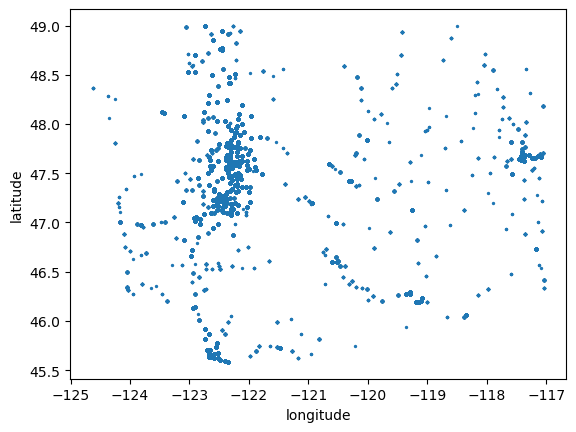

In [8]:
# we can plot all of the Washington data in a static map
wa_df.plot(kind='scatter', s=2, x='longitude', y='latitude')

In [9]:
# but we should probably take a sample if we want the interactive map to render quickly
from folium import Map
from folium import Marker

sample_size = 5000
sample_df = wa_df.sample(sample_size)

vin_map = Map(location=[47.5, -121], zoom_start=7)
for index, row in sample_df.iterrows():
    popup = '{}/{}/{}:{}'.format(row['Model Year'], row['Make'], row['Model'], row['VIN (1-10)'])
    Marker([row['latitude'], row['longitude']], popup=popup).add_to(parent=vin_map)

vin_map